# MD Simulation

Perhaps you need to install this in order to see our animation.

In [1]:
# !pip install ffmpeg-python

In [2]:
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from scipy.stats import norm  # Import statistical functions from scipy
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import matplotlib.animation as animation

In [3]:
import utilities as utls
from utilities import * #gaussian_velocity, fcc, simulate, pressure, cv, animated3d
from global_constants import * 

Now just modify the parameters you want! Remember that the timestep is defined in the global constants document, and was set to $ 0.04 \tau $

100%|██████████| 6999/6999 [00:38<00:00, 182.21it/s]


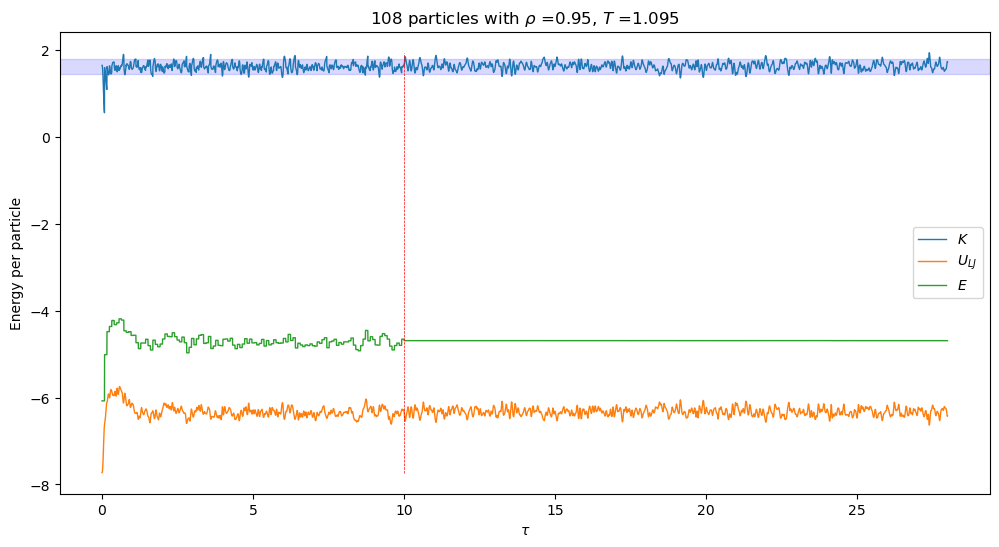

In [4]:
N, T, pos, vel, K_eq, sum_dU_r, anim = simulate(num_cells=3, rho=0.95, T=1.095, steps=7000, rescale=True, energy_plot=True, animation=False)

Uncomment and run this cell to display the animation! it may take a while... 

In [5]:
# HTML(anim.to_html5_video())

AttributeError: 'int' object has no attribute 'to_html5_video'

### Calculate Specific Heat and Pressure

In [ ]:
c_v, s_cv = block_bootstrap_observable(cv, (K_eq, N), 100, 100)
print('Specific Heat:',  c_v, s_cv)

p, s_p= block_bootstrap_observable(pressure, (sum_dU_r, T, N), 100, 100)
print('Pressure:', p, s_p)

# Data Analysis

### Checking for a value of sigma in our simulation

In [ ]:
B = np.arange(2, 500, 1)
K_err = np.zeros(len(B))
dUr_err = np.zeros(len(B))


for i in range(len(B)):
    d,K_err[i] = block_data_error(K_eq, B[i])
    d,dUr_err[i] = block_data_error(sum_dU_r, B[i])


    
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(B, K_err, lw=1)

axs[0].grid(True, linestyle =':')
axs[0].set_xlim(1,500)
# axs[0].set_ylim(0.4)
axs[0].set_title('Kinetic energy', fontsize=16, pad=16)
axs[0].set_xlabel('$b$')
axs[0].set_ylabel(r'$\sigma$ $(b)$', fontsize=12)
axs[0].axhline(y=np.mean(K_err), color='r', linestyle='--')

axs[1].plot(B, dUr_err, lw=1)

axs[1].set_xlim(1,500)
axs[1].set_title(r'$\sum_{\scr ij}$ ${\frac{dU_{ij}}{dr_{ij}}r_{ij}}$', fontsize=16, pad=18)
axs[1].grid(True, linestyle =':')
axs[1].set_xlabel('$b$')
axs[1].set_ylabel(r'$\sigma$ $(b)$', fontsize=12)
axs[1].axhline(y=np.mean(dUr_err), color='r', linestyle='--')
# plt.suptitle(r"108 particles with $\rho$ =0.95, $T$ =1.095")
plt.subplots_adjust(top=0.75, bottom=0.1)

plt.show()

In [ ]:
from data import *

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10.5, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)

for i, label in enumerate(labels):
    axs[0].plot(beta_list[i], Verlet_list[i], ls='--', lw=1, color=color_list[i])
    axs[0].errorbar(beta_list[i], p_list_108[i], yerr=unc_list_108[i], fmt='.-', ecolor=color_list[i], color=color_list[i], linewidth=1)
    axs[0].text(beta_list[i][0], p_list_108[i][0]+pad_list_108[i], label, ha='left', va='center', rotation=rot_list_108[i], color=color_list[i])
    
    axs[1].plot(beta_list[i], Verlet_list[i], ls='--', lw=1, color=color_list[i])
    axs[1].errorbar(beta_list[i], p_list_256[i], yerr=unc_list_256[i], fmt='.-', ecolor=color_list[i], color=color_list[i], linewidth=1)
    axs[1].text(beta_list[i][0], p_list_256[i][0]+pad_list_256[i], label, ha='left', va='center', rotation=rot_list_256[i], color=color_list[i])

    
axs[0].set_ylim(-4.25, 5.3)
axs[0].set_yticks(np.arange(-4, 5.3, 1))
axs[0].set_xticks(np.arange(0.1 , 1.8, 0.25))
axs[0].grid(True, which='major', linestyle='-', color='black', alpha=0.15)
axs[0].set_title('108 particles')

axs[1].grid(True, which='major', linestyle='-', color='black', alpha=0.15)
axs[1].set_title('256 particles')

axs[0].set_ylabel(r'$\beta p / \rho$', fontsize=12)
fig.text(0.5, 0.04, r'$\beta$', ha='center', fontsize=13)

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)


for i, label in enumerate(labels):
    if (i!= 0 and i!=2):
        axs[0].errorbar(beta_list[i], cv_list_108[i], yerr=s_list_108[i], fmt='.-', ecolor=color_list[i], color=color_list[i], linewidth=1, label=labels[i])
        axs[1].errorbar(beta_list[i], cv_list_256[i], yerr=s_list_256[i], fmt='.-', ecolor=color_list[i], color=color_list[i], linewidth=1)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels))

axs[0].set_xticks(np.arange(0.1 , 1.9, 0.25))
axs[0].set_ylabel(r'$c_v$', fontsize=12)
axs[0].set_title('108 particles')
axs[0].grid(True, which='major', linestyle='-', color='black', alpha=0.15)

axs[1].set_xticks(np.arange(0.1 , 1.9, 0.25))
axs[1].set_title('256 particles')
axs[1].grid(True, which='major', linestyle='-', color='black', alpha=0.15)

fig.text(0.5, 0.04, r'$\beta$', ha='center', fontsize=13)

-----------------------------------------------------------------------------------------------------------

# Correctness Checks and Plots

### FCC - Initial positions

In [ ]:
# Generate particle positions
pos_vec = fcc(num_cells=3, rho = 0.88)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos_vec[:,0], pos_vec[:,1], pos_vec[:,2])

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [ ]:
# Generate particle positions
pos_vec = fcc(num_cells=3, rho = 0.88)

# Create a 2D plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pos_vec[:,0], pos_vec[:,1])

# Add horizontal lines
for i in range(0, len(pos_vec), 2):
    ax.axhline(y=pos_vec[i,1])
# Add vertical lines
for i in range(0, len(pos_vec[::2]), 2):
    ax.axvline(x=pos_vec[::2][i,0])
# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()


### Gaussian Distribution

In [ ]:
#Generate a Gaussian velocity distribution for a system of particles with given temperature
velocity_test = gaussian_velocity(108, T)

#Define colors and labels for the plot
colors = ['red', 'green', 'blue']
labels = ['vx', 'vy', 'vz']

#Plot the histogram of the velocity distribution for each axis
plt.hist([velocity_test[:,0], velocity_test[:,1], velocity_test[:,2]], density=True, alpha=0.5, color=colors, label=labels)

#Fit the Gaussian function to the velocity distribution and plot it
mu, std = norm.fit(velocity_test)
x = np.linspace(min(min(velocity_test[:,0]), min(velocity_test[:,1]), min(velocity_test[:,2])), max(max(velocity_test[:,0]), min(velocity_test[:,1]), min(velocity_test[:,2])), 108)
y = norm.pdf(x, mu, std)
plt.plot(x, y, 'r-', label='Gaussian fit')

plt.legend()
plt.xlabel('Velocity')
plt.ylabel('Frequency')
plt.title('Velocity Distribution')


print("standard deviation (sigma) = ", std)
print("temperature = ", std**2)
print("center of mass of velocity = ", np.mean(velocity_test, axis=0))

#Display the plot
plt.show()

In [ ]:
def normal_autocorr(mu, sigma, tau, N):
    """Generates an autocorrelated sequence of Gaussian random numbers.
    
    Each of the random numbers in the sequence of length `N` is distributed
    according to a Gaussian with mean `mu` and standard deviation `sigma` (just
    as in `numpy.random.normal`, with `loc=mu` and `scale=sigma`). Subsequent
    random numbers are correlated such that the autocorrelation function
    is on average `exp(-n/tau)` where `n` is the distance between random
    numbers in the sequence.
    
    This function implements the algorithm described in
    https://www.cmu.edu/biolphys/deserno/pdf/corr_gaussian_random.pdf
    
    Parameters
    ----------
    
    mu: float
        mean of each Gaussian random number
    sigma: float
        standard deviation of each Gaussian random number
    tau: floatQ
        autocorrelation time
    N: int
        number of desired random numbers
    
    Returns:
    --------
    sequence: numpy array
        array of autocorrelated random numbers
    """
    f = np.exp(-1./tau)
    
    sequence = np.zeros(shape=(N,))
    
    sequence[0] = np.random.normal(0, 1)
    for i in range(1, N):
        sequence[i] = f * sequence[i-1] + np.sqrt(1 - f**2) * np.random.normal(0, 1)
    
    return mu + sigma * sequence


### Checks the force and the potential functions

In [ ]:
def calculate_potential(pos_t, L):
    # Calculate relative position and distance
    rel_pos = ( pos_t[:, np.newaxis, :] - pos_t[np.newaxis, :, :] + 2.62) % 5.24 - 2.62
    dist = np.linalg.norm(rel_pos, axis=2)
    
    # Calculate potential energy using Lennard-Jones potential
    u_ij = 4 * (dist**(-12) - dist**(-6))
    u_ij = np.nan_to_num(u_ij, copy=False, nan=0)
    return u_ij


def calculate_force(pos_t, L):
    # Calculate relative position and distance
    rel_pos = ( pos_t[:, np.newaxis, :] - pos_t[np.newaxis, :, :] + 2.62) % 5.24 - 2.62
    dist = np.linalg.norm(rel_pos, axis=2)
    
    # Calculate force using Lennard-Jones potential
    d = np.tile(dist[:,:,np.newaxis], (1,1,3))
    f = 4 * (-12 * d ** (-13) + 6 * d ** (-7)) * (-rel_pos) / d
    f_ij = np.nan_to_num(f, copy=False, nan=0)
    F = np.sum(f, axis=1)
    return f_ij


# Create a particle array with 2000 particles
pos = np.zeros((2000, 3))
pos[:,0] = np.linspace(0.0, 10, 2000)

# Calculate the relative position and force using the created particle array
rel_pos = (pos[:, np.newaxis, :] - pos[np.newaxis, :, :]+2.62) % 5.24 -2.62
rel_force = calculate_force(pos, 10)
rel_pot = calculate_potential(pos, 10)

# Plot the results
r = np.linalg.norm(rel_pos, axis=2)
plt.plot(r[:, 0], rel_force[:,0,0], label='force F(r_ij)')
plt.plot(r[:, 0], rel_pot[:,0], label='potential U_LJ(r_ij)')
plt.xlabel('r_ij')
plt.axhline(y=0, linestyle='--', color='gray')
plt.ylim(-2.5, 2.5)
plt.xlim(0.5, 5)
plt.legend(loc='best')


### Checking correctness of sigma  with random values

In [ ]:
b_array = np.arange(1, 500, 1, dtype=int)


test = normal_autocorr(mu=0, sigma=1, tau=50, N=10000)

s = np.zeros(len(b_array))

for i in range(2, len(b_array)):
#     print(i, b_array[i],  len(test) / b_array[i])
    d,s[i] = block_data_error(test, b_array[i])
    
plt.axhline(y=np.mean(s), color='r', linestyle='--')
    
plt.plot(b_array, s)